# Oil Price Data with Python
## Brian Dew, brianwdew@gmail.com

## Introduction
This example shows how Python can be used to take a look at oil prices. The script gathers oil price data from [Quandl](https://www.quandl.com/data/CHRIS/CME_CL1-Crude-Oil-Futures-Continuous-Contract-1-CL1-Front-Month) and plots how the price has changed over the past few months.

## Gathering data
First, we import pandas, numpy, and matplotlib and give them conventional short names

In [1]:
# Import libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/home/domestic-ra/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Next, we insert the url provided by Quandl when you click 'csv' under the API for any series. We read the csv file provided by Quandl into a pandas dataframe. 

In [2]:
# Import from Quandl WTI crude oil price data
url = "https://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1.csv"
wticl1 = pd.read_csv(url, index_col=0, parse_dates=True)
wticl1.sort_index(inplace=True)
wticl1['PctCh'] = wticl1.Last.pct_change()

## Line plot of oil price
Lastly, we can use matplotlib to plot the data. The past week has seen this measure of oil prices reach nearly $40 per barrel. 

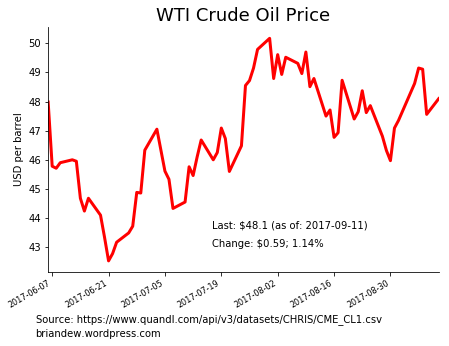

In [5]:
fig = plt.figure(figsize=[7,5])
ax1 = plt.subplot(111)
line = wticl1.Last.tail(68).plot(color='red',linewidth=3)
ax1.set_ylabel('USD per barrel')
ax1.set_xlabel('')
ax1.set_title('WTI Crude Oil Price', fontsize=18)
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)  
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
ax1.tick_params(axis='x', which='major', labelsize=8)
fig.text(0.45, 0.32,'Last: $' + str(wticl1.Last[-1]) \
         + ' (as of: ' + str(wticl1.index[-1].strftime('%Y-%m-%d'))\
         + ')');
fig.text(0.45, 0.27,'Change: $' + str(wticl1.Change[-1])  \
         + '; ' + str(round((wticl1.PctCh[-1] * 100), 2)) 
         + '%')
fig.text(0.1, 0.06, 'Source: ' + url)
fig.text(0.1, 0.02, 'briandew.wordpress.com')
plt.savefig('oil.png', dpi=1000)